In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Thuglyf-Laptop\AppData\Local\Temp\ipykernel_28900\1296059705.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


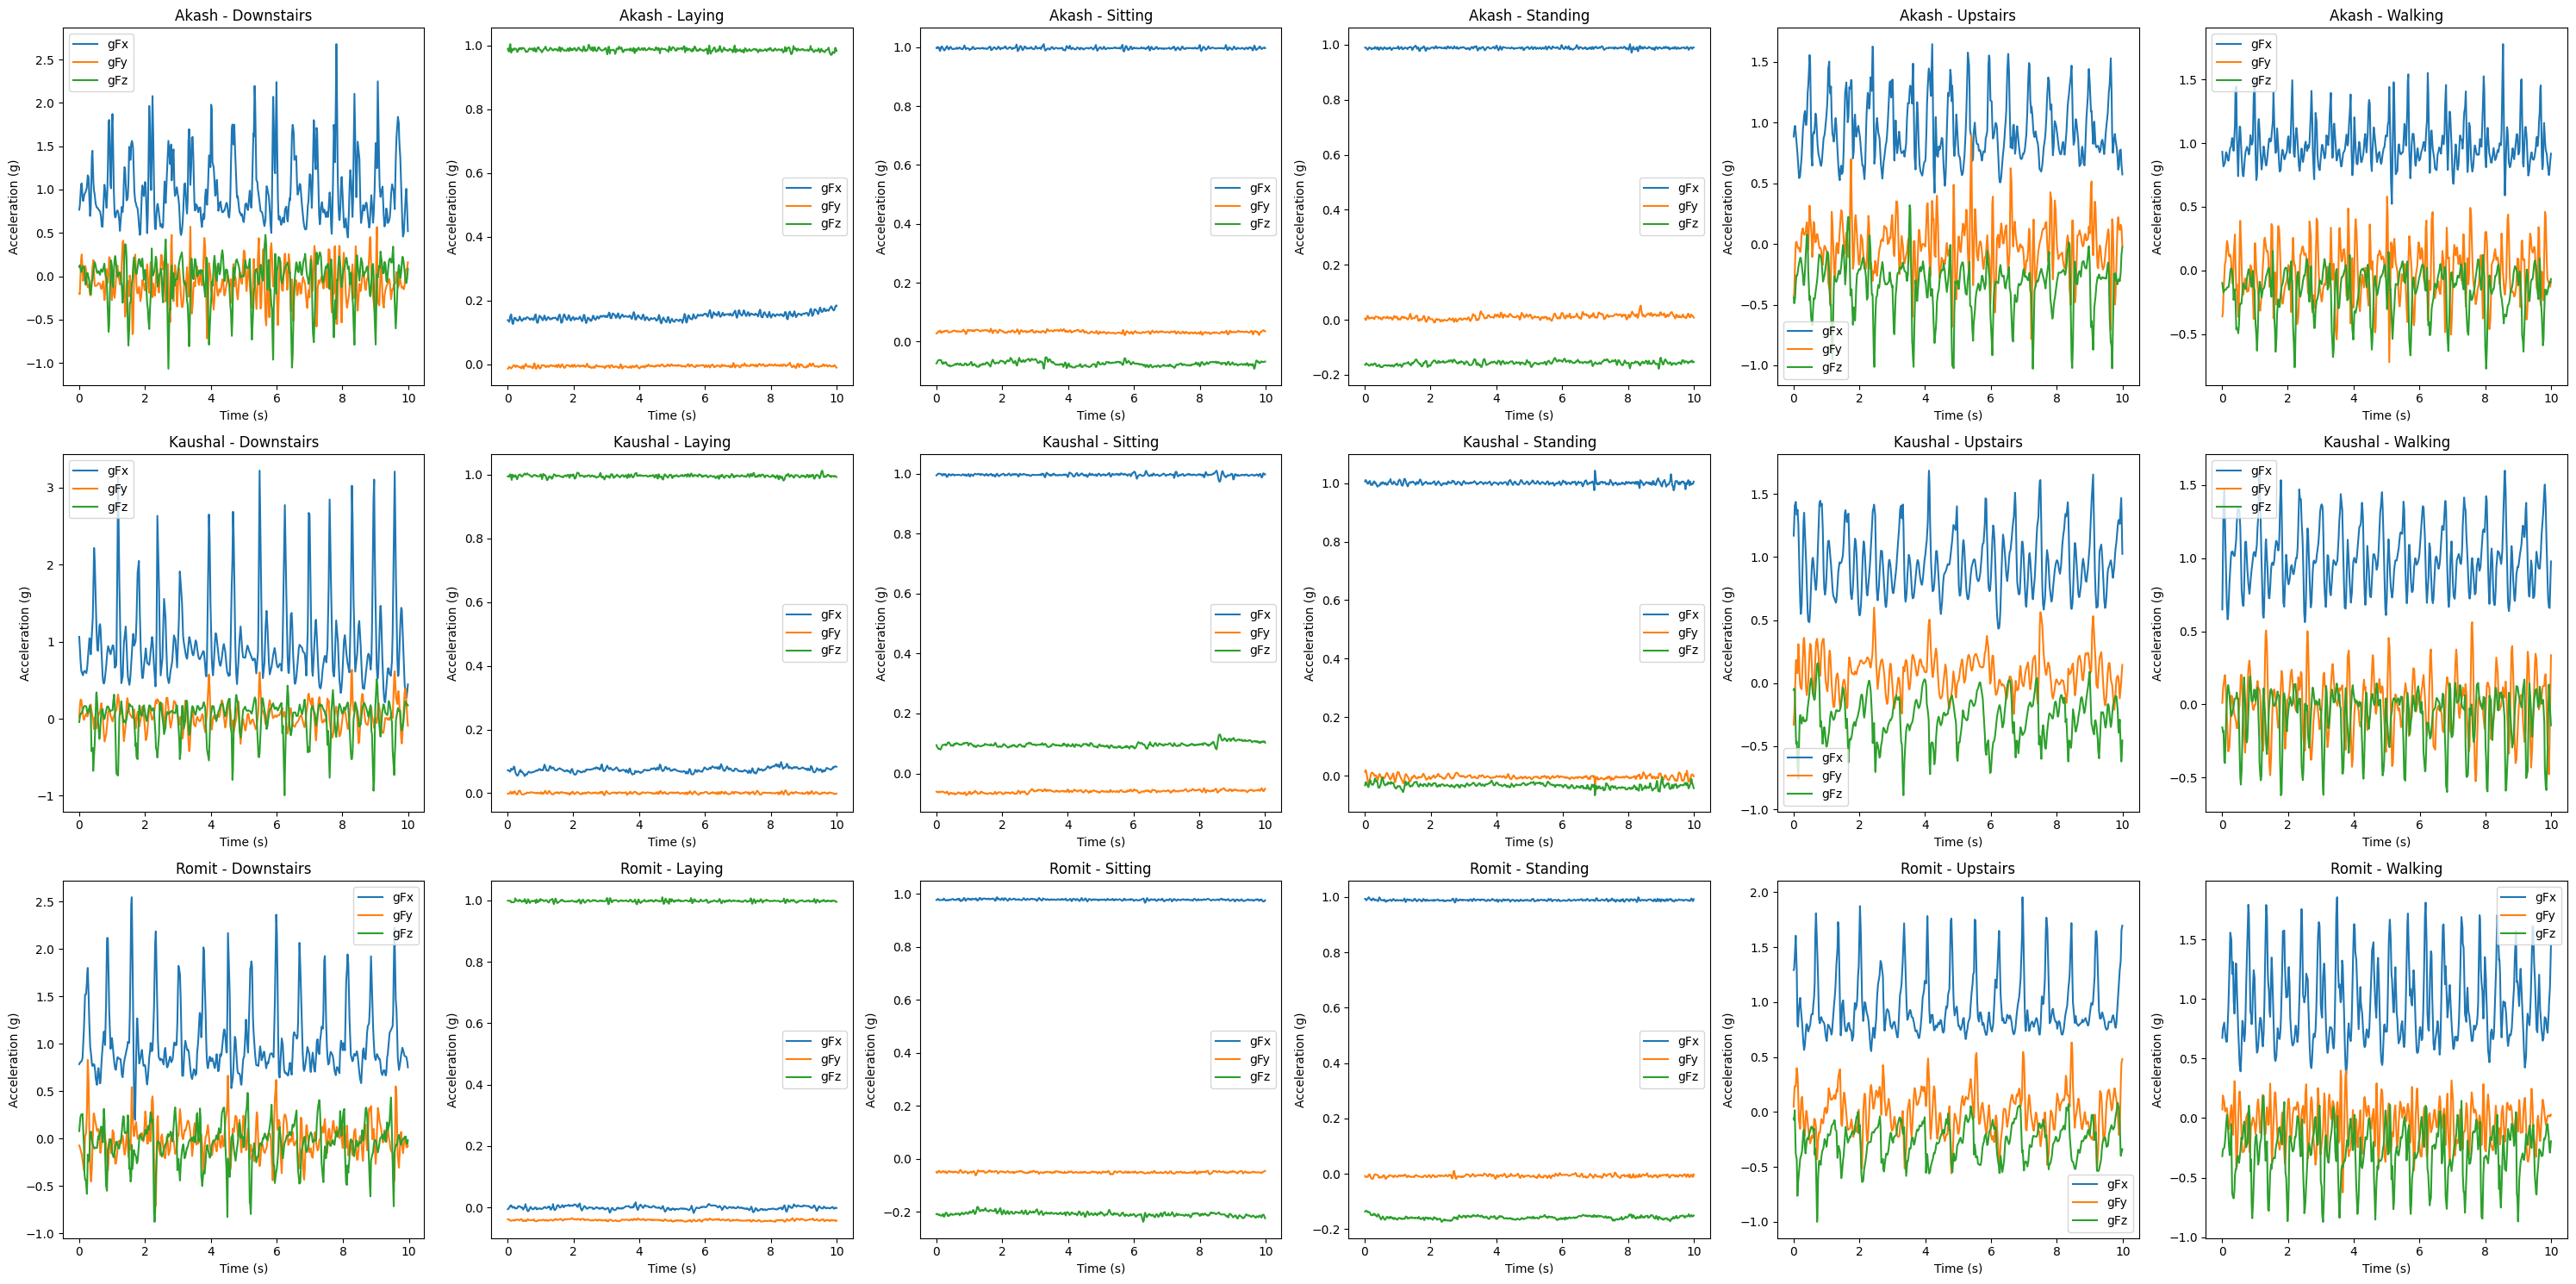

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory = "Task4-Data/Raw"


# Create a 3x6 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

plot_idx = 0  # To keep track of subplot index

for filename in os.listdir(directory):
    if '-' in filename:
        person_id, activity_id = filename.split('-')
        
        # Clean up activity_id if needed
        activity_id = activity_id.split('.')[0][:-1]

        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r') as file:
            df = pd.read_csv(file)
            
            # Apply time range filters based on the person and activity
            if activity_id == 'Standing' and person_id == 'Romit':
                df = df[(df['time'] > 3.5) & (df['time'] < 13.5)]
                df['time'] -= 3.5
            elif activity_id == 'Laying' and person_id == 'Romit':
                df = df[(df['time'] > 7.5) & (df['time'] < 17.5)]
                df['time'] -= 7.5
            elif activity_id == 'Sitting' and person_id == 'Akash':
                df = df[(df['time'] > 5.5) & (df['time'] < 15.5)]
                df['time'] -= 5.5
            else:
                df = df[(df['time'] > 2.5) & (df['time'] < 12.5)]
                df['time'] -= 2.5

            # Plot each force component against time in the corresponding subplot
            ax = axes[plot_idx]
            ax.plot(df['time'], df['gFx'], label='gFx')
            ax.plot(df['time'], df['gFy'], label='gFy')
            ax.plot(df['time'], df['gFz'], label='gFz')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Acceleration (g)')
            ax.set_title(f'{person_id} - {activity_id}')
            ax.legend()
            
            plot_idx += 1  # Move to the next subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd

# Define the directory where your files are located
directory = "Task4-Data/Raw"

# Define the mapping between the original activity names and the desired folder names
activity_mapping = {
    'Walking': 'WALKING',
    'Upstairs': 'WALKING_UPSTAIRS',
    'Downstairs': 'WALKING_DOWNSTAIRS',
    'Sitting': 'SITTING',
    'Standing': 'STANDING',
    'Laying': 'LAYING'
}

# Create output directory if it doesn't exist
output_directory = "Task4-Data/Processed"
os.makedirs(output_directory, exist_ok=True)

for filename in os.listdir(directory):
    if '-' in filename:
        person_id, activity_id = filename.split('-')
        activity_id = activity_id.split('.')[0][:-1]  # Strip any extraneous spaces or extensions

        # Map the activity to the corresponding folder name
        mapped_activity = activity_mapping.get(activity_id)
        
        if mapped_activity:
            # Create a directory for the mapped activity if it doesn't already exist
            activity_folder = os.path.join(output_directory, mapped_activity)
            os.makedirs(activity_folder, exist_ok=True)
            
            file_path = os.path.join(directory, filename)
            
            with open(file_path, 'r') as file:
                df = pd.read_csv(file)
                
                if activity_id == 'Standing' and person_id == 'Romit':
                    df = df[(df['time'] > 3.5) & (df['time'] < 13.5)]
                    df['time'] -= 3.5
                elif activity_id == 'Laying' and person_id == 'Romit':
                    df = df[(df['time'] > 7.5) & (df['time'] < 17.5)]
                    df['time'] -= 7.5
                elif activity_id == 'Sitting' and person_id == 'Akash':
                    df = df[(df['time'] > 5.5) & (df['time'] < 15.5)]
                    df['time'] -= 5.5
                else:
                    df = df[(df['time'] > 2.5) & (df['time'] < 12.5)]
                    df['time'] -= 2.5

                # Construct the output file path
                output_file_path = os.path.join(activity_folder, f'{person_id}.csv')
                
                # Save the dataframe as a CSV file
                df.to_csv(output_file_path, index=False)

print("Files have been processed and saved into respective activity folders.")


Files have been processed and saved into respective activity folders.
